# OpenCV Face Detection Webcam

In this notebook, opencv face detection will be applied to webcam images.

To run all cells in this notebook a webcam and Display Port monitor are required.

References:

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Initialize Webcam and Display Port

In [22]:
from pynq.lib.video import *
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
displayport = DisplayPort()

displayport.configure(Mode, PIXEL_RGB)

In [23]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [24]:
# initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0 + cv2.CAP_V4L2)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

Capture device is open: True


### Step 2: Show input frame on Display Port output

In [25]:
# Capture webcam image
import numpy as np

ret, frame_vga = videoIn.read()

# Display webcam image via Display Port Out
if (ret):      
    outframe = displayport.newframe()
    outframe[:] = frame_vga
    displayport.writeframe(outframe)
else:
    raise RuntimeError("Failed to read from camera.")

### Step 3: Now use matplotlib to show image inside notebook

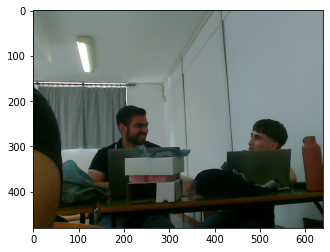

In [26]:
# Output webcam image as JPEG
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()

### Step 4: Apply the face detection to the input

In [27]:
import cv2

np_frame = frame_vga

face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np_frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

### Step 5: Show results on Display Port

In [28]:
# Output OpenCV results via Display Port
outframe = displayport.newframe()
outframe[:] = frame_vga
displayport.writeframe(outframe)

### Step 6: Now use matplotlib to show image inside notebook

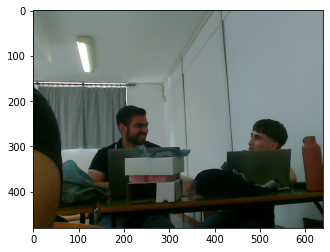

In [29]:
# Output OpenCV results via matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np_frame[:,:,[2,1,0]])
plt.show()

### Step 7: Release camera and Display Port

In [30]:
videoIn.release()
displayport.stop()

----
Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause
